In [29]:
# 일부만 할당된 GPU 메모리를 실행하는 동안 필요한만큼 늘릴 수 있도록 함
import tensorflow as tf

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config)

In [30]:
# 동일한 결과를 재현하기 위해서 random seed 고정
import numpy as np

np.random.seed(777)

In [31]:
# 모델 학습 시 불필요한 출력을 끄도록 함 (warning)
import tensorflow as tf

tf.logging.set_verbosity(tf.logging.ERROR)

# 1. 데이터 준비

In [32]:
import pandas as pd
import seaborn as sns

iris = sns.load_dataset("iris")
print(type(iris))
print(iris)

<class 'pandas.core.frame.DataFrame'>
     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
5             5.4          3.9           1.7          0.4     setosa
6             4.6          3.4           1.4          0.3     setosa
7             5.0          3.4           1.5          0.2     setosa
8             4.4          2.9           1.4          0.2     setosa
9             4.9          3.1           1.5          0.1     setosa
10            5.4          3.7           1.5          0.2     setosa
11            4.8          3.4           1.6          0.2     setosa
12            4.8          3.0           1.4          0.1     set

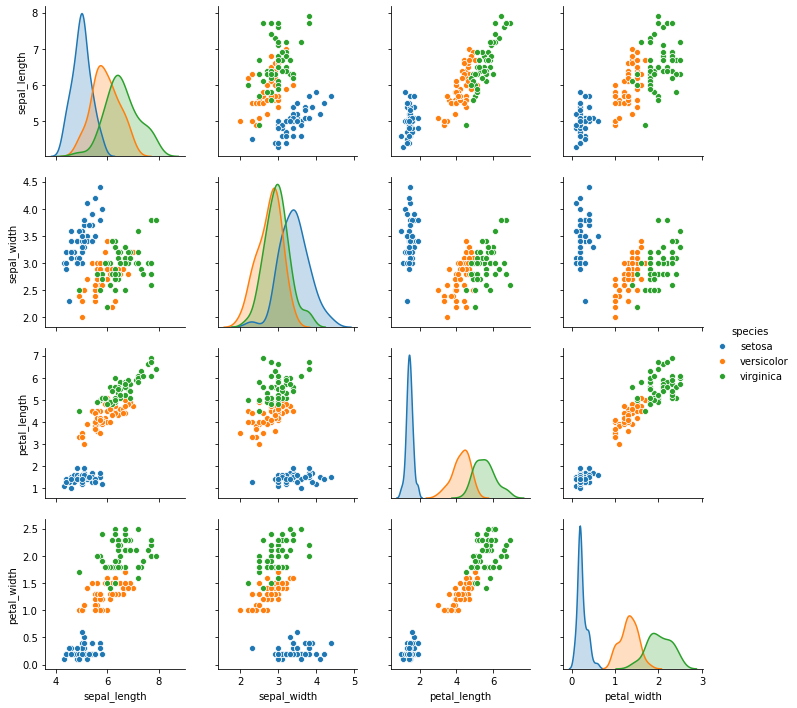

In [33]:
sns.pairplot(iris, hue="species")

In [34]:
iris.info()
iris['species'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


array(['setosa', 'versicolor', 'virginica'], dtype=object)

# 받침(Sepal)과 꽃잎(Petal)의 길이와 폭을 가지고 세 개의    종을 분류 

#  문자열로된 이름에 번호를 붙이고(LabelEncoder) 그 번호를 원핫인코딩 방식으로 펼쳐줌

In [35]:
X = iris.iloc[:,0:4].values
print(X)

print()

y = iris.iloc[:,4].values
print(y)

print(len(X))

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

# 2. 데이터 전처리

In [36]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y1 = encoder.fit_transform(y)
print(y1)

Y = pd.get_dummies(y1).values
print(Y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [38]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120, 3)
(30, 3)


# 3. 네트워크 정의 + 컴파일

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(8, input_shape=(4,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 27        
Total params: 139
Trainable params: 139
Non-trainable params: 0
_________________________________________________________________


# 4. 모델 학습

In [40]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Train on 120 samples, validate on 30 samples
Epoch 1/100
120/120 [==============================] - 0s 2ms/sample - loss: 3.5314 - acc: 0.3667 - val_loss: 4.2041 - val_acc: 0.2000
Epoch 2/100
120/120 [==============================] - 0s 150us/sample - loss: 3.2909 - acc: 0.3667 - val_loss: 3.9219 - val_acc: 0.2000
Epoch 3/100
120/120 [==============================] - 0s 183us/sample - loss: 3.0833 - acc: 0.3667 - val_loss: 3.6510 - val_acc: 0.2000
Epoch 4/100
120/120 [==============================] - 0s 183us/sample - loss: 2.8711 - acc: 0.3667 - val_loss: 3.3980 - val_acc: 0.2000
Epoch 5/100
120/120 [==============================] - 0s 150us/sample - loss: 2.6862 - acc: 0.3667 - val_loss: 3.1600 - val_acc: 0.2000
Epoch 6/100
120/120 [==============================] - 0s 174us/sample - loss: 2.5091 - acc: 0.3667 - val_loss: 2.9393 - val_acc: 0.2000
Epoch 7/100
120/120 [==============================] - 0s 158us/sample - loss: 2.3525 - acc: 0.3667 - val_loss: 2.7356 - val_acc: 0.200

Epoch 60/100
120/120 [==============================] - 0s 166us/sample - loss: 0.7091 - acc: 0.6833 - val_loss: 0.7602 - val_acc: 0.5667
Epoch 61/100
120/120 [==============================] - 0s 158us/sample - loss: 0.7055 - acc: 0.6833 - val_loss: 0.7554 - val_acc: 0.5667
Epoch 62/100
120/120 [==============================] - 0s 158us/sample - loss: 0.7019 - acc: 0.6833 - val_loss: 0.7503 - val_acc: 0.5667
Epoch 63/100
120/120 [==============================] - 0s 141us/sample - loss: 0.6990 - acc: 0.6833 - val_loss: 0.7488 - val_acc: 0.5667
Epoch 64/100
120/120 [==============================] - 0s 133us/sample - loss: 0.6948 - acc: 0.6833 - val_loss: 0.7439 - val_acc: 0.5667
Epoch 65/100
120/120 [==============================] - 0s 150us/sample - loss: 0.6914 - acc: 0.6833 - val_loss: 0.7402 - val_acc: 0.5667
Epoch 66/100
120/120 [==============================] - 0s 150us/sample - loss: 0.6878 - acc: 0.6833 - val_loss: 0.7355 - val_acc: 0.5667
Epoch 67/100
120/120 [============

# 5. 학습 과정 확인

In [41]:
hist.history

{'loss': [3.531373643875122,
  3.290939950942993,
  3.0833486398061116,
  2.87109858194987,
  2.6861944357554117,
  2.5091407775878904,
  2.352539571126302,
  2.19781657854716,
  2.057987443606059,
  1.9344520409901937,
  1.8262267033259074,
  1.7199817180633545,
  1.6341503063837688,
  1.5563515663146972,
  1.4872549613316854,
  1.4244110345840455,
  1.3763587633768717,
  1.3270525693893434,
  1.2774250427881877,
  1.2324708620707194,
  1.1886908610661824,
  1.151000730196635,
  1.1138380448023477,
  1.0769086519877116,
  1.0449428796768188,
  1.0164448380470277,
  0.9871750831604004,
  0.9578026731808981,
  0.9308786670366923,
  0.9080625176429749,
  0.8860037525494894,
  0.8652584870656331,
  0.8456164240837097,
  0.8295000672340394,
  0.8170827547709147,
  0.8085349599520365,
  0.8007211565971375,
  0.7949468930562337,
  0.7885493318239848,
  0.7841253280639648,
  0.7784791111946106,
  0.7742052555084229,
  0.7698719461758932,
  0.7652728120485942,
  0.7613983829816182,
  0.7578327

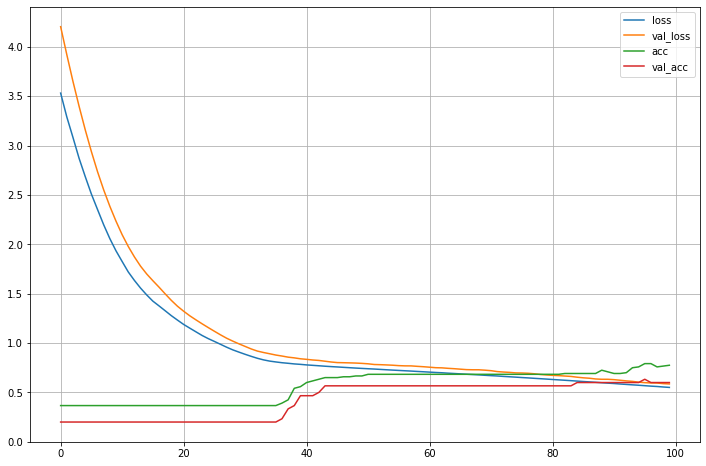

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])

plt.legend(['loss', 'val_loss', 'acc', 'val_acc'])
plt.grid()
plt.show()

# 6. 분류 결과 분석

In [43]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print(y_pred)
y_pred_class = np.argmax(y_pred, axis=1)

y_test_class = np.argmax(y_test, axis=1)

print("y_pred 값:", y_pred_class)
print("y_test 값:", y_test_class)

print(classification_report(y_test_class, y_pred_class))

[[0.02537096 0.34026533 0.6343637 ]
 [0.02941654 0.4396892  0.5308942 ]
 [0.6913698  0.05817963 0.25045058]
 [0.0117955  0.29257634 0.69562817]
 [0.6599074  0.08005547 0.26003712]
 [0.01589573 0.32664633 0.6574579 ]
 [0.65801656 0.08147157 0.2605119 ]
 [0.01632625 0.45713767 0.52653605]
 [0.01739053 0.41662756 0.5659819 ]
 [0.02477445 0.48441586 0.49080968]
 [0.0265237  0.34036    0.6331163 ]
 [0.01910612 0.48684177 0.49405202]
 [0.03152421 0.4343474  0.53412837]
 [0.01982555 0.4285506  0.5516239 ]
 [0.02482668 0.44246623 0.5327071 ]
 [0.6696171  0.07295984 0.2574231 ]
 [0.0222725  0.45843333 0.5192942 ]
 [0.04196141 0.4385747  0.5194639 ]
 [0.62151283 0.10586485 0.27262232]
 [0.672336   0.07102676 0.25663733]
 [0.02639324 0.3864972  0.58710957]
 [0.03751846 0.45751977 0.5049618 ]
 [0.65616024 0.08140779 0.26243192]
 [0.633886   0.10047968 0.2656344 ]
 [0.0219135  0.3973208  0.5807657 ]
 [0.6599405  0.08003082 0.26002872]
 [0.6726496  0.0708053  0.25654516]
 [0.02154368 0.48323417 0.49

In [44]:
y_test_class

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0], dtype=int64)

In [45]:
y_pred

array([[0.02537096, 0.34026533, 0.6343637 ],
       [0.02941654, 0.4396892 , 0.5308942 ],
       [0.6913698 , 0.05817963, 0.25045058],
       [0.0117955 , 0.29257634, 0.69562817],
       [0.6599074 , 0.08005547, 0.26003712],
       [0.01589573, 0.32664633, 0.6574579 ],
       [0.65801656, 0.08147157, 0.2605119 ],
       [0.01632625, 0.45713767, 0.52653605],
       [0.01739053, 0.41662756, 0.5659819 ],
       [0.02477445, 0.48441586, 0.49080968],
       [0.0265237 , 0.34036   , 0.6331163 ],
       [0.01910612, 0.48684177, 0.49405202],
       [0.03152421, 0.4343474 , 0.53412837],
       [0.01982555, 0.4285506 , 0.5516239 ],
       [0.02482668, 0.44246623, 0.5327071 ],
       [0.6696171 , 0.07295984, 0.2574231 ],
       [0.0222725 , 0.45843333, 0.5192942 ],
       [0.04196141, 0.4385747 , 0.5194639 ],
       [0.62151283, 0.10586485, 0.27262232],
       [0.672336  , 0.07102676, 0.25663733],
       [0.02639324, 0.3864972 , 0.58710957],
       [0.03751846, 0.45751977, 0.5049618 ],
       [0.

In [46]:
cm = confusion_matrix(y_test_class, y_pred_class) # 가로 -세로 축 유의
print(cm)

[[11  0  0]
 [ 0  1 12]
 [ 0  0  6]]


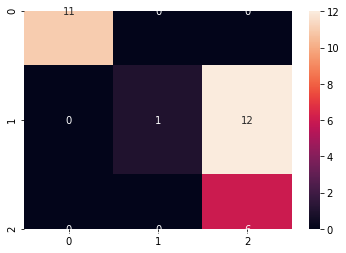

In [47]:
df_cm = pd.DataFrame(cm)
heatmap = sns.heatmap(df_cm, annot=True, fmt='d')